# The Safest Neighborhood

### Introduction: 

The best neighborhood is one in which the residents can feel safe and free from harm. Other amenities such as parks and good education systems are nice, but they are not very useful if the people are not alive to use them. There are many types of harm, but the three we will focus on are fires, crime, and step-related accidents.

### Datasets:

* Fire Incidents in Pittsbrugh: https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh
* Recorded Crimes in Pittburgh: https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e
* Population per Neighborhood:  https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv
* Neiborhood Map Data of Pittsburgh: http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.zip


---

# Fires
Fires play a large role in the number of accidents in any given city and are a crucial metric in deciding the accident safety of any neighborhood. Disparities in prevalence between neighborhoods can come down to problems complex as a faulty fire department or simple as the material the homes were built of. There are 1,318,500 fires in the U.S. a year, causing over 3,500 deaths and $25.6 billion in losses, thus making it an essential statistic. We are measuring this metric based on the number of fires in a neighborhood, with a lower number of fires being better. The dataset being used is a record of all fire incidents in the city of Pittsburgh since 2013. The analyis will analyze this data, adjusting for population and getting a yearly average, by neighborhood using both a bar graph and a heat map of Pittsburgh.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline
import geopandas as gpd

In [2]:
fire_inc = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02",
                       index_col="call_no", parse_dates=True)
total_pop = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv",
                       index_col = "Id")
fire_inc.sample(5) #Gives a sample of the dataset

,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
call_no,,,,,,,,,,,,,,,,,
F160028632,140.0,"Natural vegetation fire, Other","2400 BLOCK ALLEQUIPPA ST, PITTSBURGH PA 15213",2016-04-16T16:44:16,0,231EN10,510.0,West Oakland,6.0,4.0,4.200304e+10,3.0,4.0,4.0,2-10,40.442792,-79.965690
F150086933,111.0,Building fire,"6600 BLOCK FRANKSTOWN AVE, PITTSBURGH PA 15219",2015-11-03T23:43:37,1,231EN08,1208.0,Larimer,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-10,40.459220,-79.910882
F140041193,142.0,Brush or brush-and-grass mixture fire,"00 BLOCK BLOOMFIELD BRG, PITTSBURGH PA 15224",2014-06-10T16:22:08,0,231EN08,903.0,Lower Lawrenceville,7.0,8.0,4.200306e+10,2.0,8.0,2.0,3-1,40.461134,-79.955316
F200061865,151.0,"Outside rubbish, trash or waste fire","7600 BLOCK PENN AVE, PITTSBURGH PA 15208",2020-09-21T00:13:57,0,231EN17,1406.0,Point Breeze,9.0,14.0,4.200314e+10,3.0,14.0,4.0,3-14,40.447123,-79.895136
F160065999,111.0,Building fire,"2500 BLOCK BROWNSVILLE RD, PITTSBURGH PA 15210",2016-08-21T16:10:53,1,231EN23,2904.0,Carrick,4.0,29.0,4.200329e+10,4.0,29.0,3.0,4-23,40.386685,-79.981148


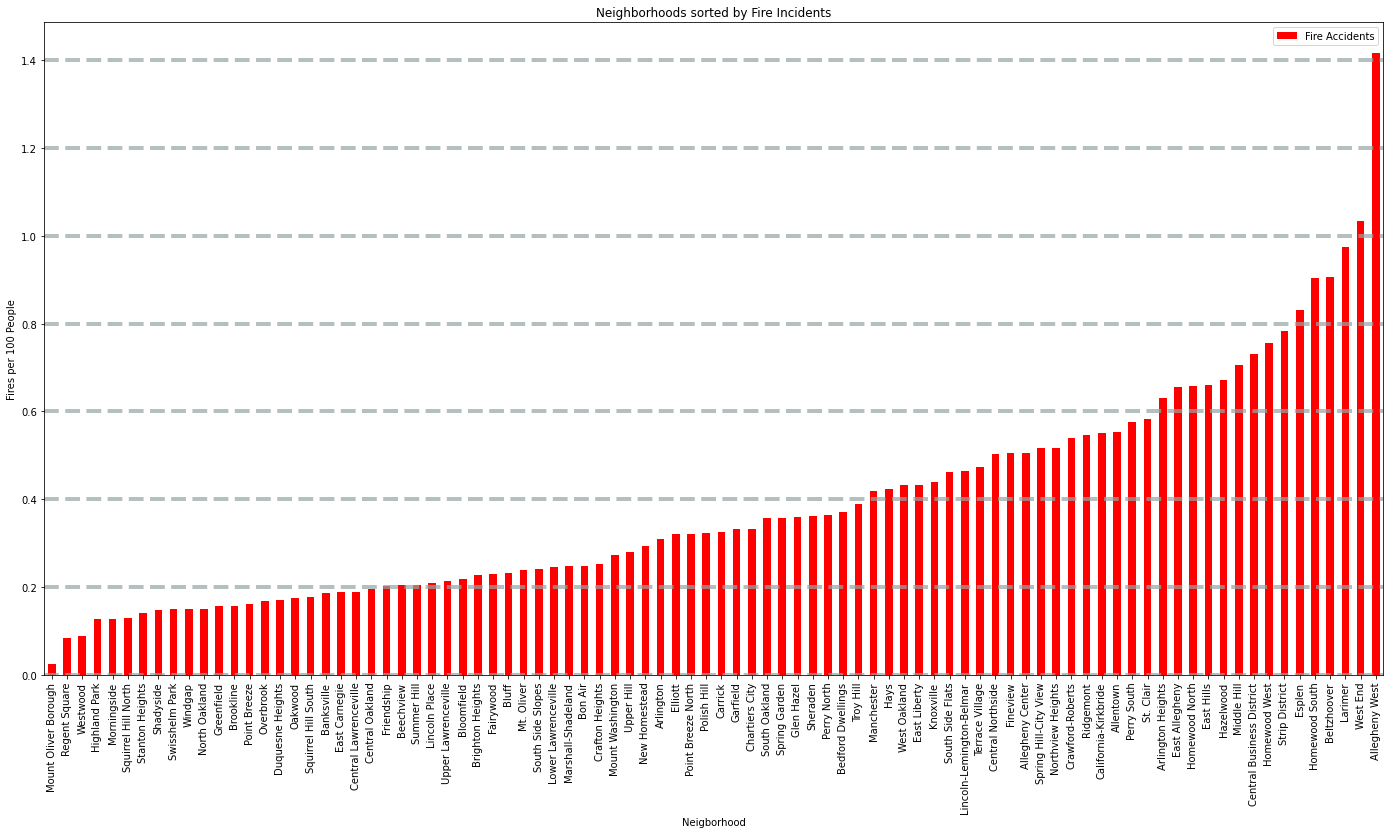

In [4]:
fires = dict() #Dictionary for the fire incidents
pops = dict()  #Dictionary for the population

for i in range(len(fire_inc)):
    if(fire_inc.iloc[i,7] in fires): #Counts the number of fire incidents for each neighborhood
        fires[fire_inc.iloc[i,7]] += 1
    else:
        fires[fire_inc.iloc[i,7]] = 1       

for i in range(len(total_pop)):
       if(total_pop.iloc[i,0] in fires): #Performs the population adjustment and year averaging if the neighborhood is in the dictionary
            fires[total_pop.iloc[i,0]] = ((float)(fires.get(total_pop.iloc[i,0]) / total_pop.iloc[i,1]) * 100) / 7
            
sorted_fires = sorted(fires.items(), key=lambda x:x[1]) #Sorts the dictinary

keys = []
values = []

for v in sorted_fires: #Appends the keys and values of the fire dictionary into lists
    keys.append(v[0])
    values.append(v[1])

for i in range(4): #Removes the outlier data from the dictionary
    keys.pop(len(keys)-1)
    values.pop(len(values)-1)

df = pd.DataFrame(values, columns = ['Fire Accidents'], index= keys) #Processes the kists as a dataframe

#This block of code simply graphs the data as a bar graph
df.plot(kind='bar', color = 'red')
plt.title("Neighborhoods sorted by Fire Incidents")
plt.xlabel("Neigborhood")
plt.ylabel("Fires per 100 People") 
plt.rcParams["figure.figsize"] = (24,12)  #Figure size is adjusted so that the names are readable
plt.grid(color='#95a5a6', linestyle='--', linewidth=4, axis='y', alpha=0.7)  #Lines are added to make the graph more readable
plt.show()

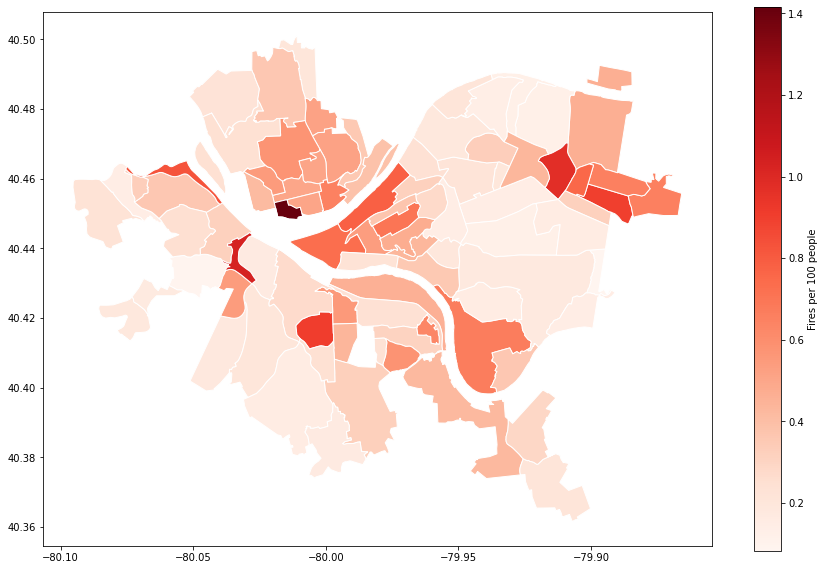

In [6]:
pitt = gpd.read_file("http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.zip")
fire_df = {'hood':keys, 'fires':values} #Makes a new data frame out of the data so that it can merged into the original dataset
fire_df = pd.DataFrame.from_dict(fire_df)
merge_fire = pitt.set_index('hood').join(fire_df.set_index('hood')) #Joins the dataseets together based on the neghborhood names
#Creates a heatmap of the data based on the color red
merge_fire.plot(column='fires', 
               cmap='Reds',              
               edgecolor="white",       
               legend=True,             
               legend_kwds={'label': "Fires per 100 people"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "white"}
               )
plt.show()

---
# Crime
Just as fires are an essential piece of neighborhood safety, crime is even more so, with homicides accounting for 18 thousand deaths a year. Further, crime is an important mettric because it often is an indicator of other aspects of the quality of neoghborhood, whether it be funding, average income, and even average education levels. Through our dataset, we will be measuring crime safety based on the number of crimes in a given neighborhood, with a lower number being better. The dataset being used is a record of all crime occurances in the city of Pittsburgh since 2005. The analyis will analyze this data, adjusting for population and getting a yearly average, by neighborhood using both a bar graph and a heat map of Pittsburgh.

In [7]:
crime_inc = pd.read_csv("https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e", index_col="PK")
crime_inc.sample(5)

,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
PK,,,,,,,,,,,,,,
2083064,5018049.0,4,2005-02-04T22:40:00,"200 Block N NEGLEY AV PITTSBURGH, PA",N,Golden Triangle/Civic Arena,5,AGG ASSAULT/OTHER/INJURY,2702 Aggravated Assault.,1104.0,9.0,2.0,-79.930122,40.464564
3050404,18243542.0,4,2018-12-11T18:58:00,"2600 Block Centre AV Pittsburgh, PA 15219",N,Terrace Village,2,AGG ASSAULT/GUN/INJURY,2702 Aggravated Assault.,510.0,6.0,3.0,-79.968380,40.446506
2926853,17128022.0,11,2017-07-05T23:00:00,"400 Block S Lang AV Pittsburgh, PA 15208",Y,Point Breeze,4,CREDIT CARDS,3925 Receiving Stolen Property. / 4101 Forgery...,1406.0,9.0,3.0,-79.905948,40.447188
2097056,5072045.0,26,2005-04-29T23:59:00,Zone 2,N,NaN,2,CORRUPTION OF MINORS,6301 Corruption of Minors.,NaN,NaN,NaN,NaN,NaN
3072966,19073574.0,99,2019-04-20T10:18:00,"Mairdale AV & Woods Run AV Pittsburgh, PA 15212",Y,Perry North,1,NaN,1543 Driving While Operating Privilege is Susp...,2602.0,1.0,1.0,-80.025122,40.485256


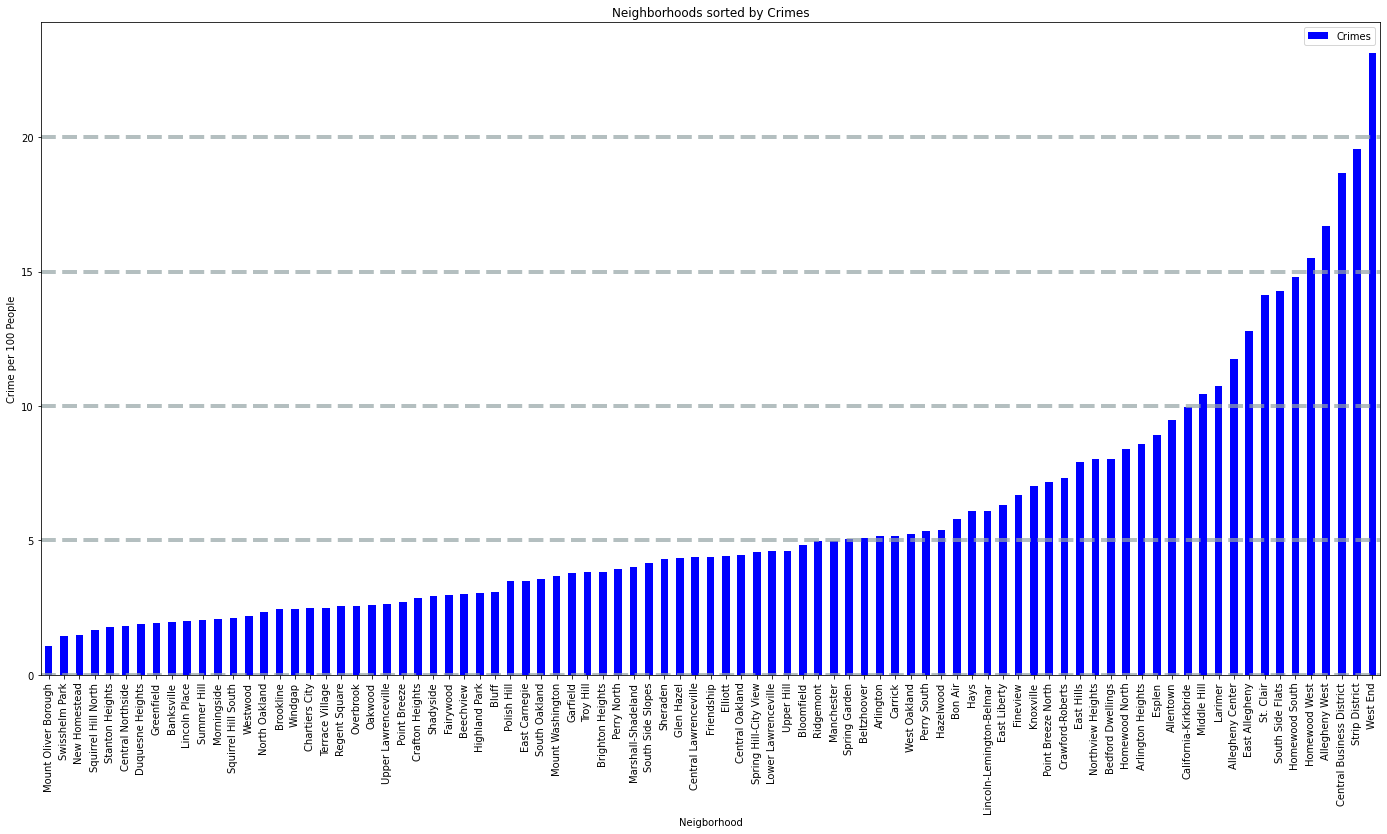

In [8]:
crime = dict() #Dictionary for crime data

for i in range(len(crime_inc)): #Creates a dictioary of how many crime incidents there are in a neighborhood
    if(crime_inc.iloc[i,5] in crime):
        crime[crime_inc.iloc[i,5]] += 1
    else:
        crime[crime_inc.iloc[i,5]] = 1    
        
crime["Mount Oliver Borough"] = (363 + 117 + 70) #This had to be manually coded in because it had three different names in the dataset         
 
for i in range(len(total_pop)):
       if(total_pop.iloc[i,0] in crime): #Adjusts for population and year
            crime[total_pop.iloc[i,0]] = ((float)(crime.get(total_pop.iloc[i,0]) / total_pop.iloc[i,1]) * 100)/15
            

sorted_crime = sorted(crime.items(), key=lambda x:x[1]) #Sorts the dictionary

keys = []
values = []
for v in sorted_crime: #Makes a list of the neighborhood names and crime occurances so that they can be made into a dataframe
    keys.append(v[0])
    values.append(v[1])

#This dataset was faulty and had less consistent data    
for i in range(13): #Removes the outliers
    keys.pop(len(keys)-1)
    values.pop(len(values)-1)

#Makes a bar graph in a similar fashion to the fire graph
df = pd.DataFrame(values, columns = ['Crimes'], index= keys) 
df.plot(kind='bar', color = 'blue')
plt.title("Neighborhoods sorted by Crimes")
plt.xlabel("Neigborhood")
plt.ylabel("Crime per 100 People")
plt.rcParams["figure.figsize"] = (24,12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=4, axis='y', alpha=0.7)
plt.show()

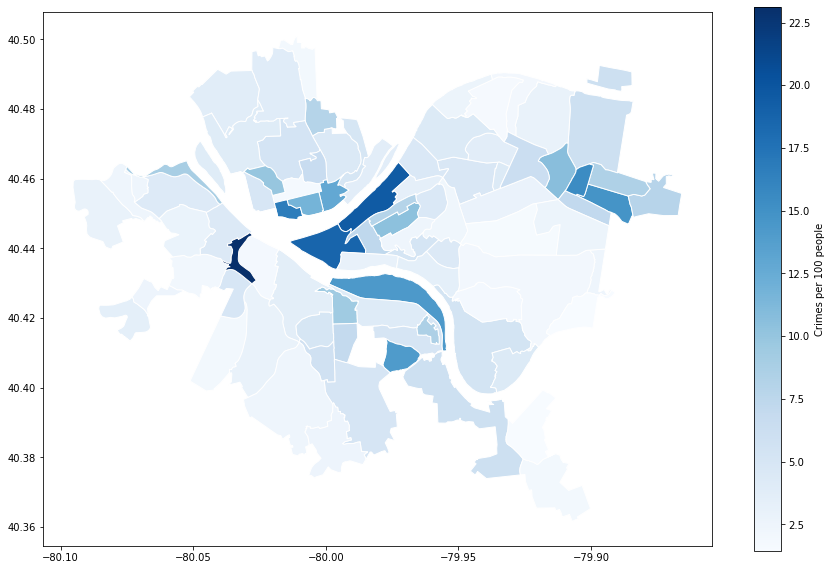

In [9]:
pitt = gpd.read_file("http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.zip")
#Creates a heat map of Pittsburgh based on crime data
crime_df = {'hood':keys, 'crime':values} #Data frame of our results of the dataset
crime_df = pd.DataFrame.from_dict(crime_df)
merge_crime = pitt.set_index('hood').join(crime_df.set_index('hood')) #Joins the origianl and new dataset
merge_crime.plot(column='crime', 
               cmap='Blues',              
               edgecolor="white",       
               legend=True,             
               legend_kwds={'label': "Crimes per 100 people"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "white"}
               )
plt.show()

## Analysis
The results of the crime incidents show similar trends to that of the fire data, with many of the neighborhoods ranking high. Notably, Mount Oliver Borough, Squirrel Hill and Swissvale rank highly again, putting them in contention for the safest neighborhoods in Pittsburgh. The geographic trends are dually constent as the center of the city tend to produce higher crime even when adjusted for population. Also, again, the busnisess districts in Pittsburgh like the Strip District performed poorly due to the high volume of people and busniess occurring in its confines. Therefore, again, if you are picking a neighborhood solely on your safety, it is best to pick a home in the more residentially designated areas. As of now, Mount Oliver Borough has been the safest Pittsburgh area, claiming both the lowest crime and fire rate in the city.